<a href="https://colab.research.google.com/github/silvia-j-escobar/Amazon-Operational-Strategy-People-Analytics-Externship/blob/main/P3_S2_2_Learn_How_to_Break_Down_Text_and_Visualize_Keywords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/sample_cleaned_reviews.csv')
df

,cleaned_text
0,supportive team great training
1,management helpful coworkers friendly culture
2,fast paced challenging environment
3,toxic manager poor communication
4,opportunity grow learn new skills
5,long hours overtime burnout
6,love company mission positive vibe
7,underpaid overworked no recognition
8,flexible schedule good benefits
9,lack transparency from leadership


In [3]:
from collections import Counter

# Join all cleaned reviews into one big string, then split into words
all_words = ' '.join(df['cleaned_text']).split()

# Count frequency of each word
word_counts = Counter(all_words)

In [4]:
print(word_counts.most_common(5))

[('team', 3), ('poor', 3), ('supportive', 2), ('great', 2), ('training', 2)]


In [7]:
word_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)
word_df

,word,count
1,team,3
15,poor,3
0,supportive,2
3,training,2
2,great,2
...,...,...
84,guidance,1
85,learning,1
86,curve,1
87,mentorship,1


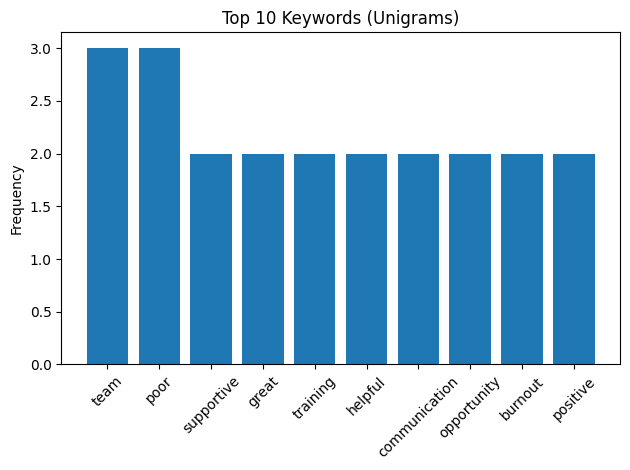

In [8]:
import matplotlib.pyplot as plt

most_common = word_counts.most_common(10)
words, counts = zip(*most_common)

plt.bar(words, counts)
plt.title("Top 10 Keywords (Unigrams)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [9]:
stop_keywords = ['team','company', 'job', 'work']
filtered_words = [word for word in all_words if word not in stop_keywords]
filtered_counts = Counter(filtered_words)

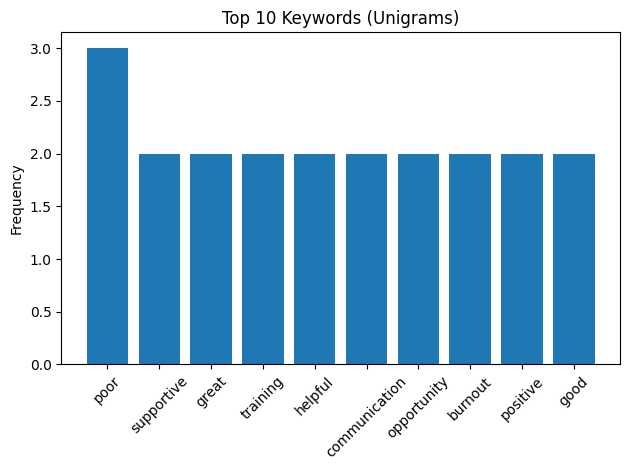

In [10]:
most_common = filtered_counts.most_common(10)
words, counts = zip(*most_common)

plt.bar(words, counts)
plt.title("Top 10 Keywords (Unigrams)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [11]:
from nltk.util import ngrams

bigrams = list(ngrams(all_words, 2))
trigrams = list(ngrams(all_words, 3))

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)


In [12]:
print(bigram_counts.most_common(3))

[(('supportive', 'team'), 1), (('team', 'great'), 1), (('great', 'training'), 1)]


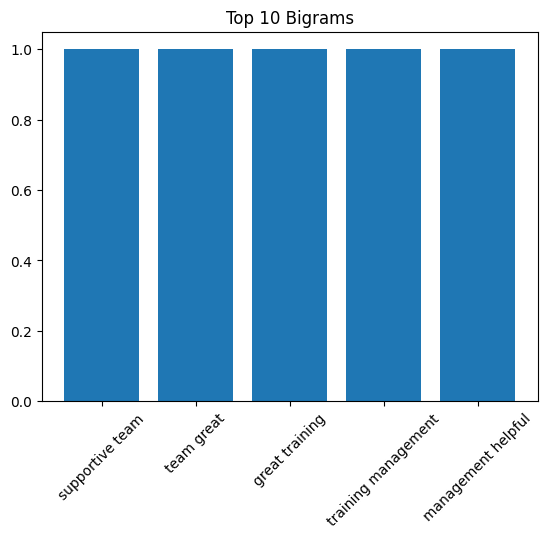

In [14]:
# For bigrams
common_bigrams = bigram_counts.most_common(5)
bg_labels = [' '.join(bg) for bg, count in common_bigrams]
bg_counts = [count for bg, count in common_bigrams]

plt.bar(bg_labels, bg_counts)
plt.title("Top 10 Bigrams")
plt.xticks(rotation=45)
plt.show()


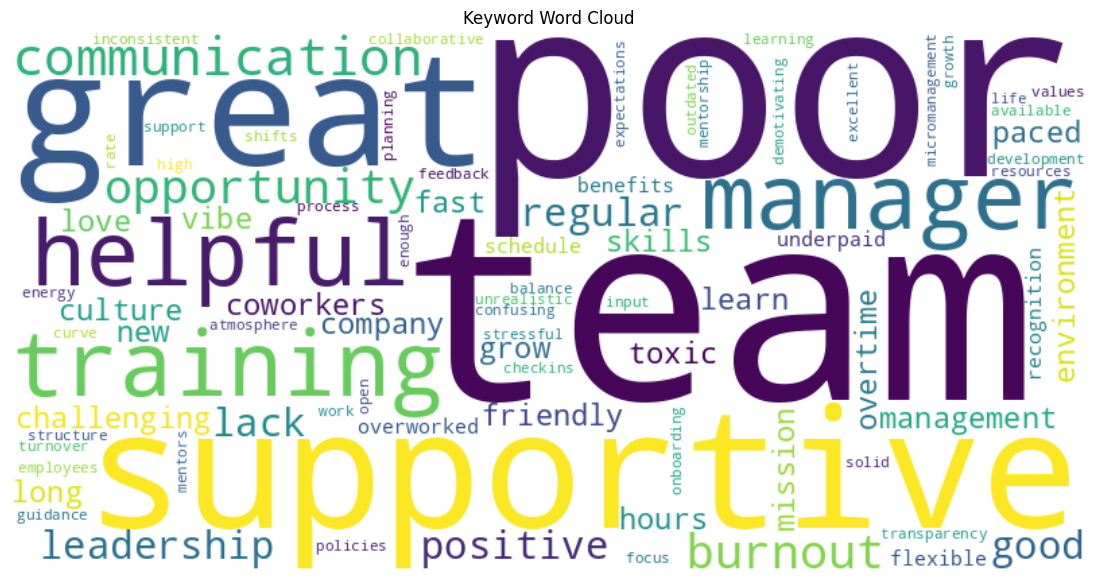

In [15]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Word Cloud")
plt.show()